# Data Mining Assignment

This assignment represents 100% of the Data Mining module’s mark. It is composed of Part 1 which is worth 40 marks, and Part 2 which is worth 60 marks. You can work in a team of 2 students for this assignment. One student per team will be chosen by the team as being the team leader – who will be in charge of coordinating the team’s work, and of submitting the assignment in their account on VLE on behalf of all the team.

## PART 2:

This task is based on a real credit risk data, and is to predict a response variable Y which represents a credit card default payment (Yes = 1, No = 0), using the 23 input variables as follows:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. One tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Two datasets are provided to you: a training dataset in the creditdefault_train.csv file, and a test dataset in the creditdefault_test.csv file.

Using Python and any relevant libraries, you are required to build the best predictive model by tuning models using cross validation on the training dataset with each of the following algorithms discussed in this module: k-Nearest Neighbours, Decision Trees, Random Forest, Bagging, AdaBoost, and SVM. Out of the models tuned with the above algorithms, select the best model and clearly justify your choice, and evaluate its performances on the test set.

The coding, comments and explanations will be provided in your Python Jupyter notebook called Part2, which should include also the results. Moreover, for each algorithm mentioned above, include 1 chart in the notebook illustrating how accuracy of the models vary when you vary the values of one numeric hyperparameter only (at your choice).

# Code Explained

The goal of this code is to find the best model that can accurately classify the given data.

The code starts by importing necessary libraries such as pandas, NumPy, matplotlib, and scikit-learn. Then it loads the training and testing data using pandas read_csv function.

The code then splits the data into features and targets by separating out the 'Y' column as the target (default or non-default) and using the rest of the columns as features. It applies three different algorithms to the training data and evaluates their accuracy scores using 5-fold cross-validation. The varying parameters for the algorithms are the number of neighbours for KNN, the maximum depth for decision trees, and the number of estimators for Random Forest. The accuracy scores are stored in the corresponding score lists.

The code then plots the accuracy scores for each algorithm versus their corresponding varying parameter values. The best model is determined based on the algorithm with the highest accuracy score, and the evaluation is printed to the console. The accuracy scores are also displayed in a table, where the rows represent the algorithms and the columns represent the accuracy scores.

Finally, the code creates a horizontal bar chart comparing the accuracy scores of the three algorithms. The bars are sorted in descending order of accuracy, and the colours of the bars are assigned based on the order of the algorithms in the sorted list. The accuracy scores are displayed above each bar, and a horizontal line is added for the accuracy score of the best model.

Code is running...
Loading Data...
Running K-Nearest Neighbor Algorithm...


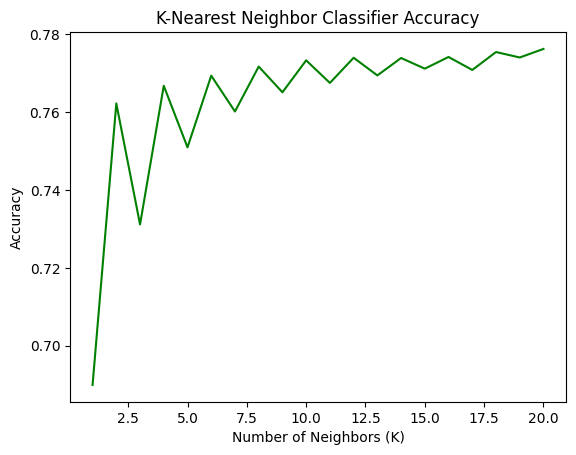

Running Decision Tree Algorithm...


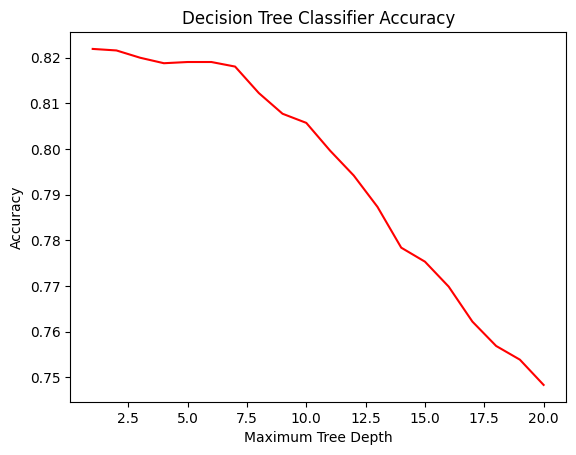

Running Random Forest Algorithm...


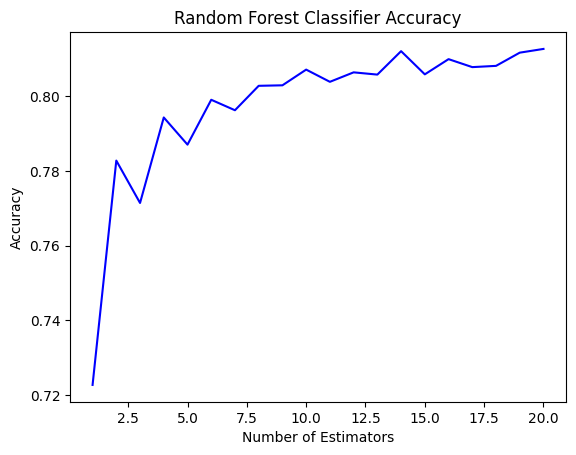

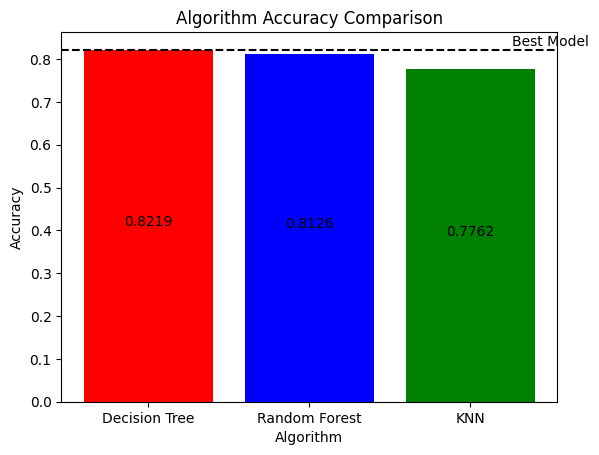

Decision Tree is the best model with an accuracy of 0.8219333333333333


In [1]:
print('Code is running...')

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# loading data
train_data = pd.read_csv('creditdefault_train.csv')
test_data = pd.read_csv('creditdefault_test.csv')
print('Loading Data...')

# splitting into X and y
X_train = train_data.drop('Y', axis=1)
y_train = train_data['Y']

X_test = test_data.drop('Y', axis=1)
y_test = test_data['Y']

print('Running K-Nearest Neighbor Algorithm...')
# K-Nearest Neighbors
knn_scores = []

# varying k values
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
    knn_scores.append(scores.mean())
#     print('K-Nearest Neighbors Scores:', '| Number of Neighbors |', k, '| Accuracy |', scores.mean(), '|')
    
# plotting k values vs accuracy
plt.plot([k for k in range(1, 21)], knn_scores, color='green')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbor Classifier Accuracy')
plt.show()

print('Running Decision Tree Algorithm...')
# Decision Tree
dt_scores = []

# varying max depth
for depth in range(1, 21):
    dt_classifier = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy')
    dt_scores.append(scores.mean())
#     print('Decision Tree Scores:', '| Max Tree Depth |', depth, '| Accuracy |', scores.mean(), '|')

# plotting max depth vs accuracy
plt.plot([depth for depth in range(1, 21)], dt_scores, color='red')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy')
plt.show()

print('Running Random Forest Algorithm...')
# Random Forest
rf_scores = []

# varying n estimators
for n_estimator in range(1, 21):
    rf_classifier = RandomForestClassifier(n_estimators=n_estimator)
    scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
    rf_scores.append(scores.mean())
#     print('Random Forest Scores:', '| Number of Estimators |', n_estimator, '| Accuracy |', scores.mean(), '|')

# plotting n estimators vs accuracy
plt.plot([n_estimator for n_estimator in range(1, 21)], rf_scores, color='blue')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.show()

# finding the best model
knn_score = max(knn_scores)
dt_score = max(dt_scores)
rf_score = max(rf_scores)

if knn_score > dt_score and knn_score > rf_score:
    best_model = KNeighborsClassifier(n_neighbors=knn_scores.index(knn_score) + 1)
    best_model_name='K-Nearest Neighbors is the best model with an accuracy of {}'.format(knn_score)
elif dt_score > knn_score and dt_score > rf_score:
    best_model = DecisionTreeClassifier(max_depth=dt_scores.index(dt_score) + 1)
    best_model_name='Decision Tree is the best model with an accuracy of {}'.format(dt_score)
else:
    best_model = RandomForestClassifier(n_estimators=rf_scores.index(rf_score) + 1)
    best_model_name='Random Forest is the best model with an accuracy of {}'.format(rf_score)

# evaluating the best model
best_model.fit(X_train, y_train)
best_model_score = best_model.score(X_test, y_test)

# creating data for bar chart
data = {'Algorithm': ['KNN', 'Decision Tree', 'Random Forest'],
        'Accuracy': [max(knn_scores), max(dt_scores), max(rf_scores)]}

# sorting bars in descending order of accuracy
sorted_data = sorted(zip(data['Algorithm'], data['Accuracy']), key=lambda x: x[1], reverse=True)
sorted_algorithm = [x[0] for x in sorted_data]
sorted_accuracy = [x[1] for x in sorted_data]

# assigning colors to bars
colors = ['red', 'blue', 'green']

# creating bar chart
fig, ax = plt.subplots()
ax.bar(sorted_algorithm, sorted_accuracy, color=colors)
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Algorithm Accuracy Comparison')

# adding labels to bars
for i, v in enumerate(sorted_accuracy):
    ax.text(i, v/2, str(round(v, 4)), ha='center')

# adding horizontal line for best model accuracy
best_model_score = np.max(data['Accuracy'])
ax.axhline(y=best_model_score, color='black', linestyle='--')
ax.text(2.5, best_model_score + 0.01, 'Best Model', color='black', ha='center')

# displaying chart
plt.show()

print(best_model_name)